### Prepare a prediction model for profit of 50_startups data.
### Do transformations for getting better predictions of profit.
### Make a table containing R^2 value for each prepared model.

# Import Libraries and read data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
#Read the data
su = pd.read_csv("C:/Users/HP/Desktop/ExcelR/Data Science/Python/Assignments/Multi Linear Regression/50_Startups.csv")
su

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Check for missing values

In [3]:
su.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
# Check if values in State column are categorical 
pd.unique(su.State)


array(['New York', 'California', 'Florida'], dtype=object)

In [5]:
# check for missing values
su.isna().sum()
# There are no missing or NA values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Correlation Matrix

In [6]:
su.corr()
# Input Variables do not have High correlation

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

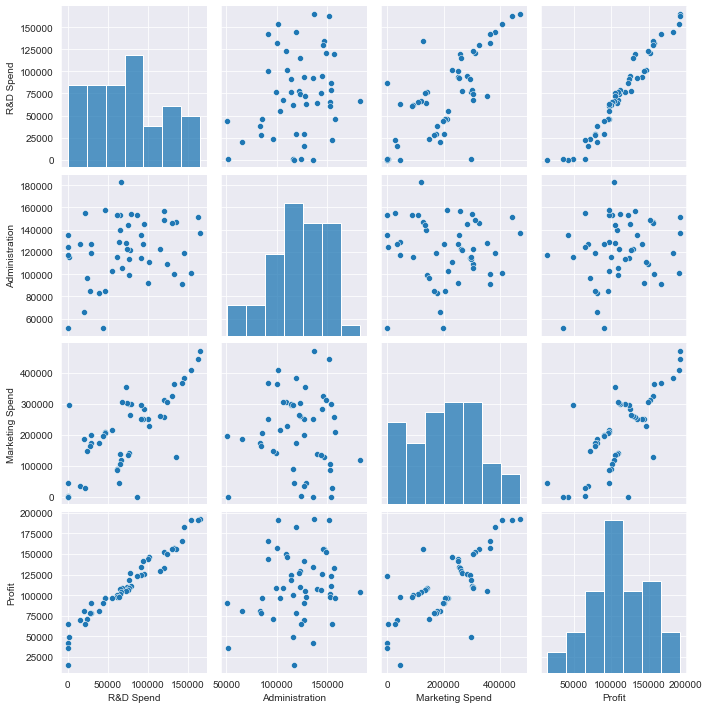

In [7]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(su)

# Preparing a model

In [8]:
# Rename Columns
su.rename(columns = {'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend'},inplace=True)
su.head()


,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
#Build model
model = smf.ols("Profit~RD_Spend+Administration+Marketing_Spend",data=su).fit()


In [10]:
#Coefficients
model.params


Intercept          50122.192990
RD_Spend               0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [11]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)
# Pvalues of Administration and Marketing Spend are higher so we will create simple linear regression models for them and check their pvalues separately and combined

Intercept           7.626218
RD_Spend           17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
RD_Spend           2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [12]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple Linear Regression Models

In [13]:
ml_a=smf.ols('Profit~Administration',data = su).fit()  
#t and p-Values
print(ml_a.tvalues, '\n', ml_a.pvalues)  
# pvalue for Profit~Administration is more

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [14]:
ml_m=smf.ols('Profit~Marketing_Spend',data = su).fit()  
print(ml_m.tvalues, '\n', ml_m.pvalues) 
# pvalue for Profit~Marketing_Spend is less

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [15]:
ml_am=smf.ols('Profit~Administration+Marketing_Spend',data = su).fit()  
print(ml_am.tvalues, '\n', ml_am.pvalues)  
# pvalue for Profit~Administration+Marketing_Spend is less

Intercept          1.142741
Administration     2.467779
Marketing_Spend    8.281039
dtype: float64 
 Intercept          2.589341e-01
Administration     1.729198e-02
Marketing_Spend    9.727245e-11
dtype: float64


# Calculating VIF

In [16]:
rsq_rd = smf.ols('RD_Spend~Administration+Marketing_Spend',data=su).fit().rsquared  
vif_rd = 1/(1-rsq_rd) # 2.46

rsq_ad = smf.ols('Administration~RD_Spend+Marketing_Spend',data=su).fit().rsquared  
vif_ad = 1/(1-rsq_ad) # 1.17

rsq_ms = smf.ols('Marketing_Spend~RD_Spend+Administration',data=su).fit().rsquared  
vif_ms = 1/(1-rsq_ms) #  2.32

# Storing vif values in a data frame
d1 = {'Variables':['RD_Spend','Administration','Marketing_Spend'],'VIF':[vif_rd,vif_ad,vif_ms]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


,Variables,VIF
0,RD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


# As the Simple linear model of Profit~Administration+Marketing_Spend and VIF score indicate that there is no correlation between input variables, going ahead with our regression model as usual

# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


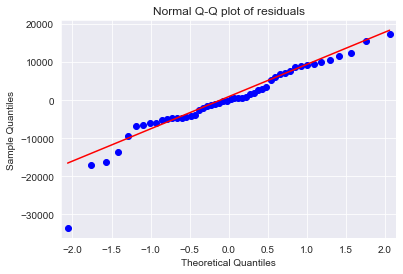

In [17]:
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Q-Q plot if has most of the points on 45 degree line, it shows that errors are normally distributed

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

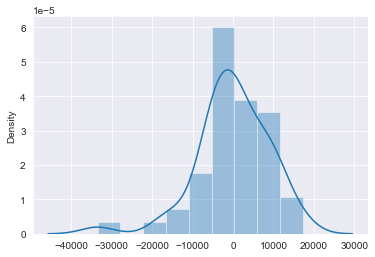

In [18]:
sns.distplot(model.resid)

## Residual Plot for Homoscedasticity

In [19]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

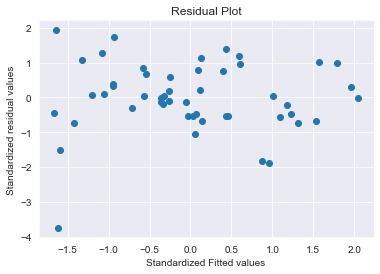

In [20]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# This graph should not follow 'U' or Inverse'V' pattern
# This proves that errors are randomly distributed and hence parameters are linearly related

## Residual Vs Regressors

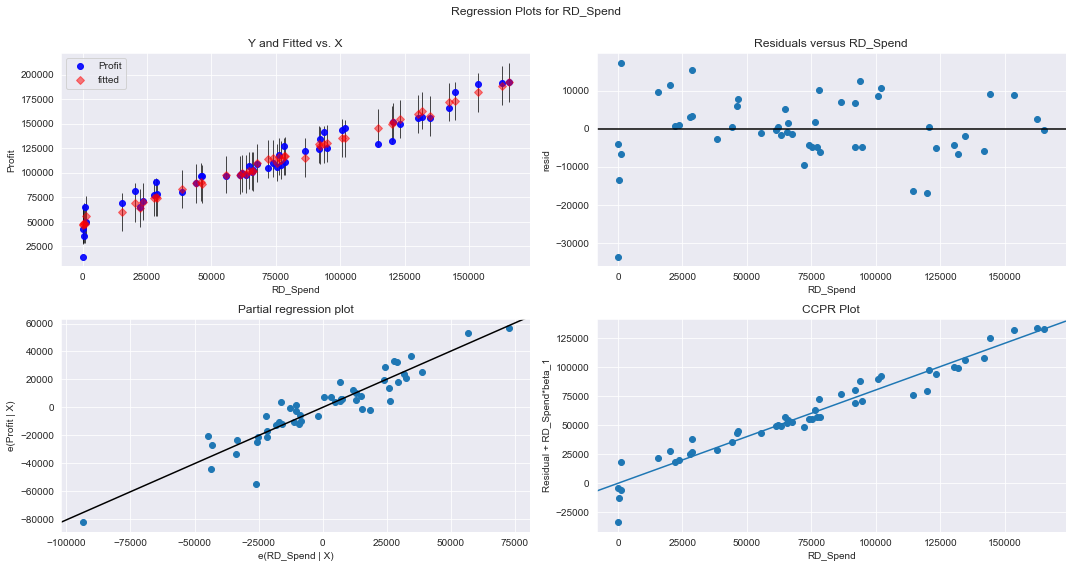

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD_Spend", fig=fig)
plt.show()

# This residual graph should not follow 'U' or Inverse'V' pattern

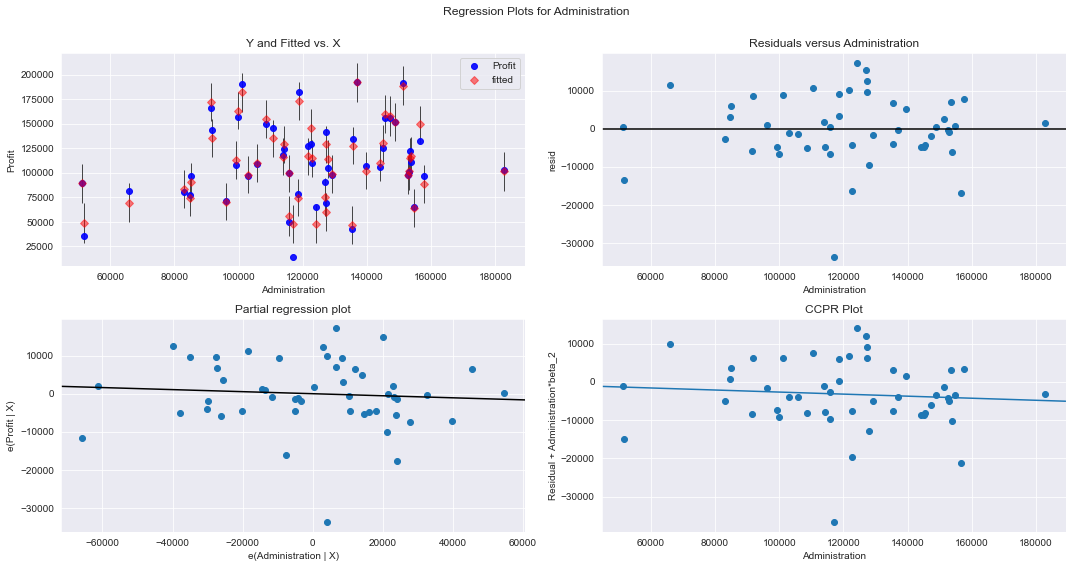

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

# This residual graph should not follow 'U' or Inverse'V' pattern

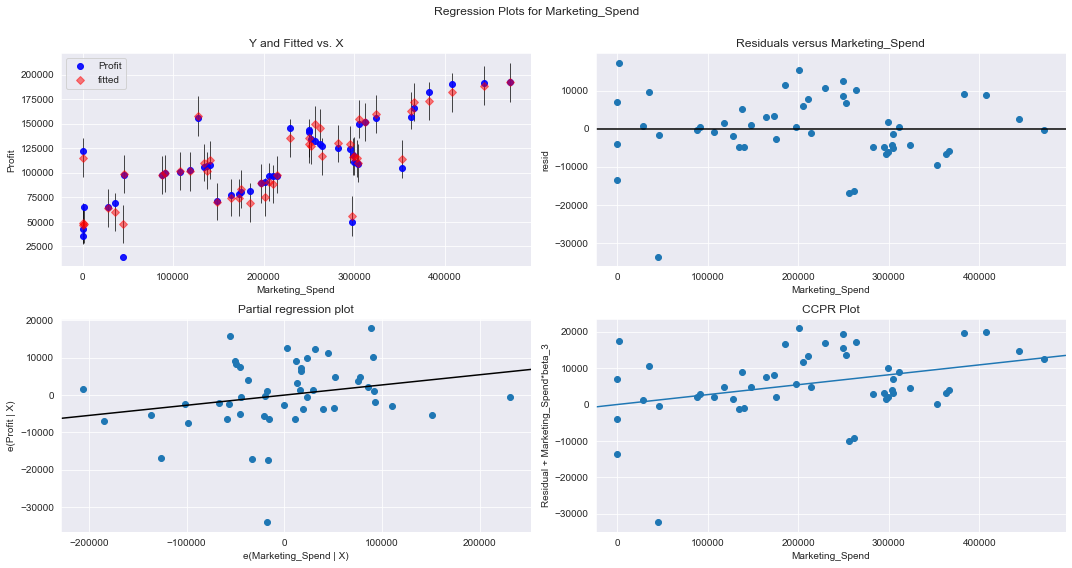

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

# This residual graph should not follow 'U' or Inverse'V' pattern

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [24]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

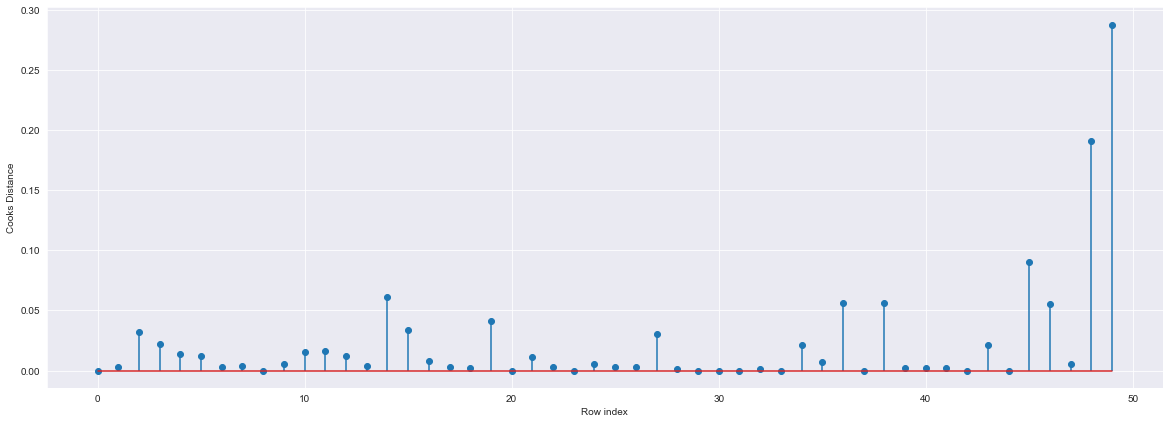

In [25]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(su)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
#index and value of influencer where c(Cook's Distance) is more
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

## High Influence points

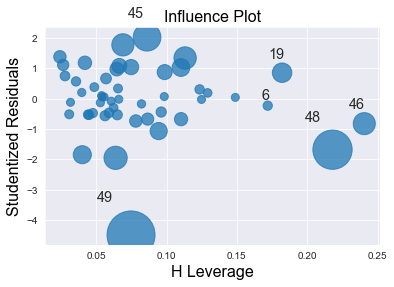

In [27]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

#### From the above plot, it is evident that 49 is the influencer

In [28]:
su[su.index.isin([49])]

,RD_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [29]:
#See the differences 
su.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the model

In [30]:
#Load the data
su_new = su
su_new

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [31]:
#Discard the data points which are influencers and reassign the row number (reset_index())
su1=su_new.drop(su_new.index[[49]],axis=0).reset_index()
su1

,index,RD_Spend,Administration,Marketing_Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [32]:
#Drop the original index
su1=su1.drop(['index'],axis=1)

In [33]:
su1

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#### Build Model

In [34]:
# Generate R-Squared and AIC values
final_ml= smf.ols("Profit~RD_Spend+Administration+Marketing_Spend",data=su1).fit()

In [35]:
(final_ml.rsquared,final_ml.aic)

(0.9613162435129847, 1020.5652974526367)

#### Cook’s Distance

In [36]:
model_influence = final_ml.get_influence()
(c_V, _) = model_influence.cooks_distance

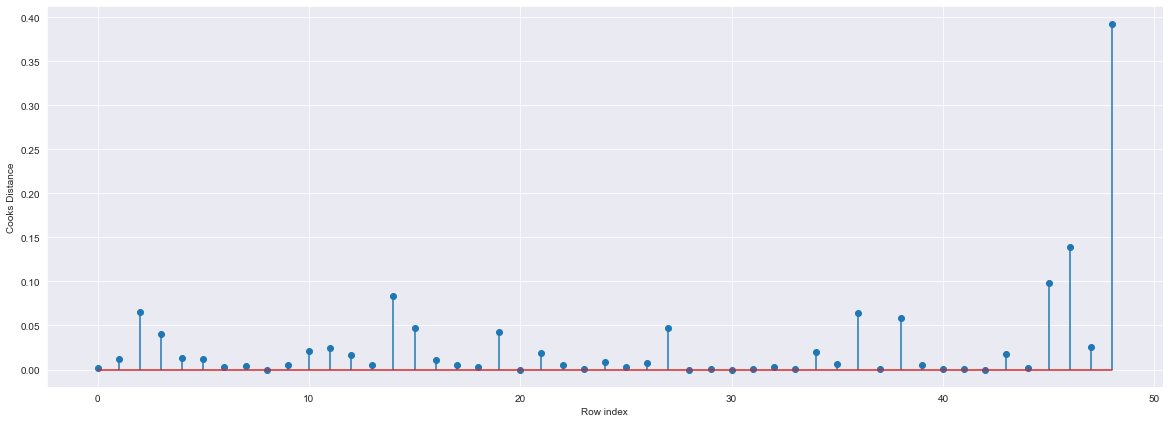

In [37]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(su1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [38]:
#index of the data points where c is more 
(np.argmax(c_V),np.max(c_V))

(48, 0.39274420556321554)

In [39]:
#Drop row 48
su2=su1.drop(su1.index[[48]],axis=0).reset_index()
su2=su2.drop(['index'],axis=1)
su2

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#### Build Model again

In [40]:
# Generate R-Squared and AIC values
final_ml= smf.ols("Profit~RD_Spend+Administration+Marketing_Spend",data=su2).fit()

In [41]:
(final_ml.rsquared,final_ml.aic)

(0.9626766170294073, 994.6690439260116)

#### Cook’s Distance

In [42]:
model_influence = final_ml.get_influence()
(c_V, _) = model_influence.cooks_distance

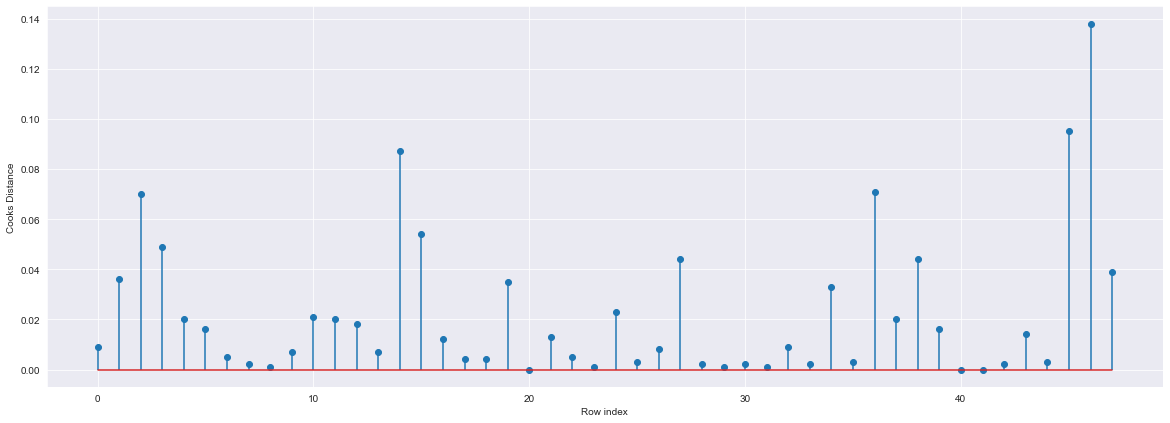

In [43]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(su2)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [44]:
#index of the data points where c is more 
(np.argmax(c_V),np.max(c_V))

(46, 0.13829133994334772)

In [45]:
#Drop row 46
su3=su2.drop(su2.index[[46]],axis=0).reset_index()
su3=su3.drop(['index'],axis=1)
su3

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#### Build Model again

In [46]:
# Generate R-Squared and AIC values
final_ml= smf.ols("Profit~RD_Spend+Administration+Marketing_Spend",data=su3).fit()

In [47]:
(final_ml.rsquared,final_ml.aic)

(0.9614129113440602, 973.2489443962857)

# As we have improved our R-Square, we will stop deletion diagnostics

In [48]:
su_new = pd.read_csv("C:/Users/HP/Desktop/ExcelR/Data Science/Python/Assignments/Multi Linear Regression/50_Startups.csv")
su_new.rename(columns = {'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend'},inplace=True)
su_new

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [49]:
pred_y=final_ml.predict(su_new)

In [50]:
pred_y

0     189144.021141
1     185571.505316
2     180343.992254
3     171860.489927
4     171153.336127
5     162804.123770
6     156477.343357
7     158187.870039
8     150255.251593
9     154352.656745
10    135977.904080
11    136546.022058
12    129455.572750
13    127661.509729
14    147998.542616
15    145793.706944
16    118010.693099
17    129938.578129
18    129669.713023
19    116105.658621
20    117938.402714
21    117474.656407
22    115854.360943
23    111858.337361
24    115352.079636
25    103683.989930
26    111491.723852
27    115392.974943
28    101954.513645
29    102912.662101
30    101740.441122
31     99040.236547
32    100968.977775
33    100540.396562
34     90608.105042
35     94025.014882
36     78421.052027
37     94122.405580
38     74828.161109
39     87671.677996
40     78232.195211
41     79164.837264
42     74891.654066
43     64193.943484
44     67653.399768
45     52436.773768
46     60527.147366
47     51024.934949
48     55890.542698
49     53139.241409


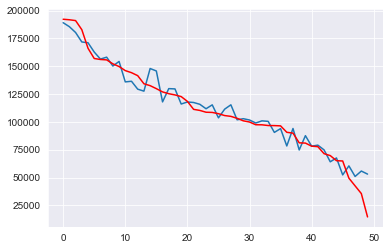

In [51]:
plt.plot(pred_y)
plt.plot(su_new.Profit,c='r')
plt.show()

## Predicting for new data

In [52]:
#New data for prediction
new_data=pd.DataFrame({"RD_Spend":46000,"Administration":85000,"Marketing_Spend":205000,"State":'New York',"Profit":96000},index=[1])

In [53]:
final_ml.predict(new_data)

1    94003.837965
dtype: float64